In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nbadataanalysis/nba.csv


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("/kaggle/input/nbadataanalysis/nba.csv")

In [29]:
df.shape

(458, 9)

In [30]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [31]:
df.tail()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
453,Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
454,Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [37]:
df.isnull().sum()

Name         1
Team         1
Number       1
Position     1
Age          1
Height       1
Weight       1
College     85
Salary      12
dtype: int64

In [38]:
df.dropna(inplace = True)

In [39]:
df.drop_duplicates(inplace =True)

In [40]:
pd.isnull(df).sum()

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64

# **DATA TRANSFORMATION**

In [41]:
fix_height = 75

In [42]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary'],
      dtype='object')

In [45]:
df['BMI'] = (df['Weight']/(fix_height**2))*703

In [46]:
df.columns

Index(['Name', 'Team', 'Number', 'Position', 'Age', 'Height', 'Weight',
       'College', 'Salary', 'BMI'],
      dtype='object')

In [47]:
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,BMI
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0,22.496000
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0,29.369778
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0,23.120889
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0,29.369778
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0,29.744711


In [52]:
df.drop("Height",inplace = True, axis = 1)

In [53]:
df.head()

,Name,Team,Number,Position,Age,Weight,College,Salary,BMI
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,180.0,Texas,7730337.0,22.496000
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,235.0,Marquette,6796117.0,29.369778
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,185.0,Georgia State,1148640.0,23.120889
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,235.0,LSU,1170960.0,29.369778
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,238.0,Gonzaga,2165160.0,29.744711


# **EXPLORATORY DATA ANALYSIS**

In [54]:
df[['Age','Weight','BMI']].describe()

,Age,Weight,BMI
count,364.000000,364.000000,364.000000
mean,26.615385,219.785714,27.468330
std,4.233591,24.793099,3.098586
min,19.000000,161.000000,20.121422
25%,24.000000,200.000000,24.995556
50%,26.000000,220.000000,27.495111
75%,29.000000,240.000000,29.994667
max,40.000000,279.000000,34.868800


Text(0.5, 1.0, 'DISTRIBUTION OF PLAYERS AGE')

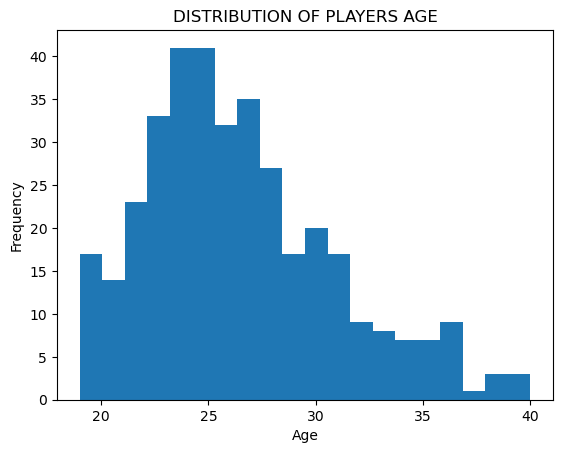

In [55]:
plt.hist(df['Age'],bins= 20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('DISTRIBUTION OF PLAYERS AGE')

<Figure size 1000x600 with 0 Axes>

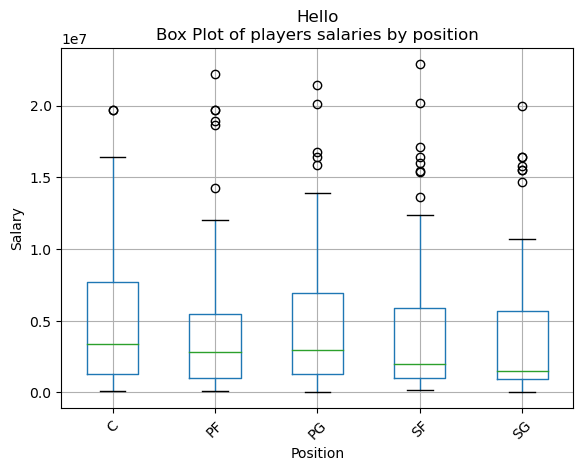

In [60]:
plt.figure(figsize=(10,6))
df.boxplot(column ='Salary',by='Position')
plt.ylabel('Salary')
plt.title('Box Plot of players salaries by position')
plt.suptitle('Hello')
plt.xticks(rotation=45)
plt.show()

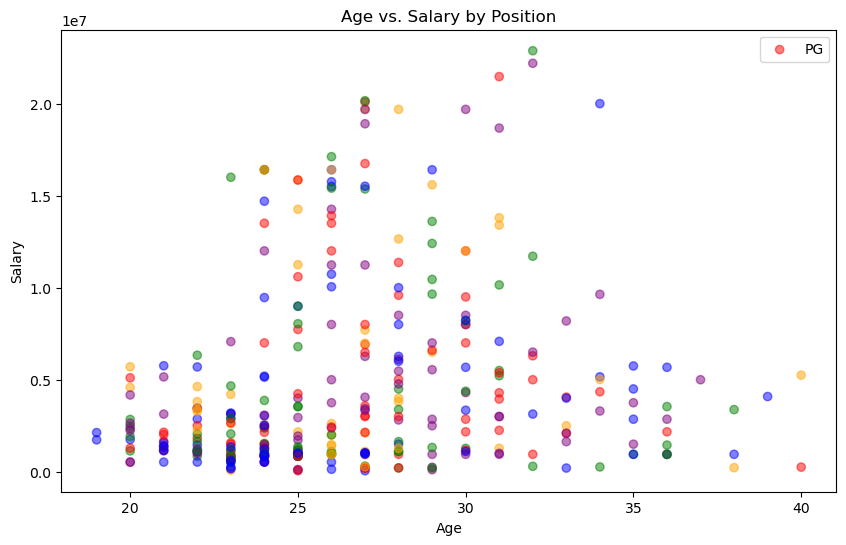

In [61]:
plt.figure(figsize=(10,6))
colors ={'PG':'red','SG':'blue','SF': 'green','PF': 'purple','C':'orange'}
plt.scatter(df['Age'],df['Salary'],c=df['Position'].map(colors), alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs. Salary by Position')
plt.legend(colors)
plt.show()

In [63]:
top_players = df.nlargest(10,'Salary')
print(top_players)

                  Name                   Team  Number Position   Age  Weight  \
33     Carmelo Anthony        New York Knicks     7.0       SF  32.0   240.0   
339         Chris Bosh             Miami Heat     1.0       PF  32.0   235.0   
100         Chris Paul   Los Angeles Clippers     3.0       PG  31.0   175.0   
414       Kevin Durant  Oklahoma City Thunder    35.0       SF  27.0   240.0   
164       Derrick Rose          Chicago Bulls     1.0       PG  27.0   190.0   
349        Dwyane Wade             Miami Heat     3.0       SG  34.0   220.0   
23         Brook Lopez          Brooklyn Nets    11.0        C  28.0   275.0   
98      DeAndre Jordan   Los Angeles Clippers     6.0        C  27.0   265.0   
174         Kevin Love    Cleveland Cavaliers     0.0       PF  27.0   251.0   
294  LaMarcus Aldridge      San Antonio Spurs    12.0       PF  30.0   240.0   

          College      Salary        BMI  
33       Syracuse  22875000.0  29.994667  
339  Georgia Tech  22192730.0  29

In [71]:
top_college = df['College'].value_counts().nlargest(5)
print(top_college)

Kentucky          22
Duke              18
Kansas            18
North Carolina    16
UCLA              14
Name: College, dtype: int64


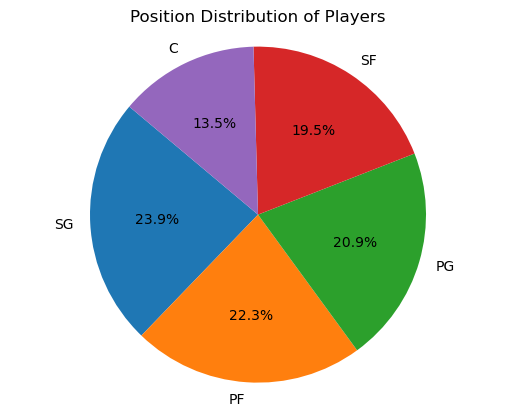

In [86]:
position_counts = df['Position'].value_counts()
plt.pie(position_counts,labels = position_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Position Distribution of Players')
plt.axis('equal')
plt.show()

In [88]:
avg_salary_by_team = df.groupby('Team')['Salary'].mean()
print(avg_salary_by_team)

Team
Atlanta Hawks             5.125755e+06
Boston Celtics            3.461756e+06
Brooklyn Nets             3.654087e+06
Charlotte Hornets         3.978124e+06
Chicago Bulls             6.105483e+06
Cleveland Cavaliers       6.733472e+06
Dallas Mavericks          4.761692e+06
Denver Nuggets            4.240886e+06
Detroit Pistons           4.477884e+06
Golden State Warriors     6.711293e+06
Houston Rockets           4.404132e+06
Indiana Pacers            4.004800e+06
Los Angeles Clippers      6.707637e+06
Los Angeles Lakers        3.270445e+06
Memphis Grizzlies         4.374068e+06
Miami Heat                6.583812e+06
Milwaukee Bucks           4.771040e+06
Minnesota Timberwolves    2.663774e+06
New Orleans Pelicans      4.262526e+06
New York Knicks           5.270655e+06
Oklahoma City Thunder     5.822521e+06
Orlando Magic             3.788729e+06
Philadelphia 76ers        2.213778e+06
Phoenix Suns              3.457318e+06
Portland Trail Blazers    3.220121e+06
Sacramento Kings    

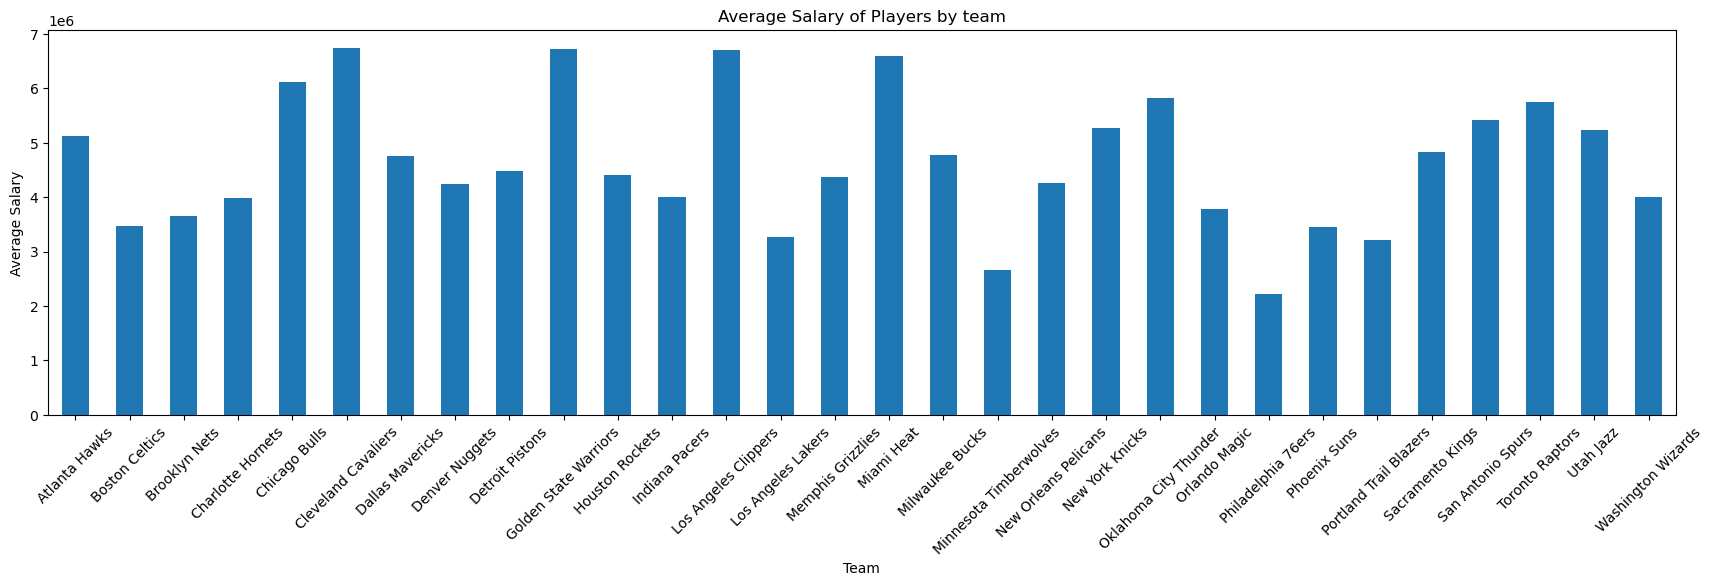

In [89]:
plt.figure(figsize=(21,5))
avg_salary_by_team.plot(kind = 'bar')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.title('Average Salary of Players by team')
plt.xticks(rotation=45)
plt.show()

# **Conclusion**

1. From above data analysis we can conclude some interesting factors like Highest salary by team (Atlanta Hawks),most persons having position in SG.
2. Top player having highest salary is Carmelo Anthony.